# Entropia e informação mútua <a class="anchor" id="3"></a>

## Informação

Teoria da informação é uma área muito interessante que nos forneceu métodos para medir coisas relacionadas à ignorância que temos sobre uma hipótese. Sua compreenssão é fundamental para que possamos criar e compreender diversas métricas usadas em machine learning, como a entropia, e também para desenvolver modelo probabilísticos.

Suponha que temos uma variável aleatória $x$ e estamos interessados na quantidade de informação que obteremos ao medir algum valor de $x$. Se o evento (resultado de uma medição é $x$) é altamente improvável, ao medí-lo obteremos mais informação do que se ele for altamente provável. Se você tem certeza de que algo irá acontecer, não terá nada novo (nenhuma informação extra) quando observar esse evento.

A informação é portanto, dada por uma quantidade $h(x)$ que é uma função da distribuição de probabilidade $p(x)$. Se observarmos dois eventos, $x$ e $y$, e eles não estiverem relacionados a quantidade total de informação obtida será simplemente a soma da informação dos dois eventos:

$$h(x,y) = h(x) + h(y)\ \iff \ p(x,y) = p(x)p(y)$$

Obs: $\iff$ lê-se "se e somente se".

Como é costume, descrevemos a informação com o logarítmo da distribuição de probabilidade. Se $x$ for uma variável discreta podemos usar a base $2$,

$$h(x) = - log_{2}p(x).$$

O valor esperado (expectation em inglês, ou esperança se você foi aluno de uma universidade chique) desta quantidade é o que chamamos de `entropia` da variável $x$,

$$H[x] = -  \sum_{x} p(x) log_{2}p(x)$$

Obs: *valor esperado* é o termo utilizado na Física.

Se a chance de observarmos $x$ é nula, $p(x)=0$, não obteremos informação alguma, $H[x]=0$.

Tomemos um exemplo, suponha que observamos a rolagem de um dado não enviesado de oito faces e queremos transmitir a alguém a informação sobre o valor esperado:

In [30]:
import numpy as np

H = -8*(1/8)*np.log2(1/8)
H

3.0

Essa quantidade é medida em `bits` e nesse caso precisamos de um número de pelo menos 3 `bits` para transmitir essa informação. Caso $x$ seja contínuo é comum usar o logarítmo natural e a unidade de medida passa a ser `nats`.

Vejamos um exemplo com três distribuições com a mesma média, mas com diferentes desvios padrões.

In [31]:
p1 = np.array([0.2,0.2,0.2,0.2,0.2])
p2 = np.array([0.1,0.15,0.5,0.15,0.1])
p3 = np.array([0.0,0.005,0.99,0.005,0.0])

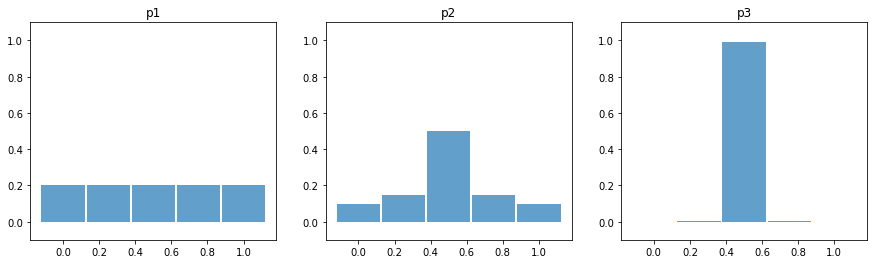

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
plt.subplot(131)
plt.bar(np.linspace(0,1,5),p1,alpha=0.7,width=0.24)
plt.title("p1")
plt.ylim(-0.1,1.1)
plt.subplot(132)
plt.bar(np.linspace(0,1,5),p2,alpha=0.7,width=0.24)
plt.title("p2")
plt.ylim(-0.1,1.1)
plt.subplot(133)
plt.bar(np.linspace(0,1,5),p3,alpha=0.7,width=0.24)
plt.title("p3")
plt.ylim(-0.1,1.1)
plt.show()

Definimos uma função para calcular a entropia:

In [33]:
def H(p):
    return np.sum([-val*np.log(val) if val > 0 else 0 for val in p])

H(p1),H(p2),H(p3)

(1.6094379124341005, 1.376226604344546, 0.06293300616044681)

A distribuição mais estreita tem menor entropia. Isso ocorre pois a incerteza que temos sobre seu valor esperado é menor. Novamente, se alguma distribuição é $ p(x_{i})=1 $ o resto todo será $p(x_{j \ne i})=0$, ou seja, incerteza nula e informação $H(x_{i})=0$.

## Entropia diferencial <a class="anchor" id="3-1"></a>

Podemos também usar uma distribuição $p(x)$ contínua e assim a soma discreta se torna uma integral. Neste caso é comum chamar a entropia de `entropia diferencial`:

$$H[x] = -\int p(x) \ln p(x) dx.$$

Algo que acho muito interessante é responder a pergunta *Qual é a distribuição de probabilidade que maximiza a entropia?*

A distribuição Gaussiana é aquela que maximiza a entropia diferencial (isso faz sentido, pois é a distribuição favorita da natureza):

$$H[x] =  -\int_{-\infty}^{+\infty} \mathcal{N}(x\vert \mu, \sigma^{2}) \ln \mathcal{N}(x\vert \mu, \sigma^{2}) dx = \frac{1}{2}(1 + \ln{2 \pi \sigma^{2}}).$$

Este resultado concorda com o exemplo visto anteriormente, a entropia aumenta conforme a distribuição se torna mais larga, ou seja, $\sigma^{2}$ aumenta. No fim dessa lição há mais detalhes sobre esse desenvolvimento.

## Entropia condicional <a class="anchor" id="3-2"></a>

Mudamos agora para o caso em que temos uma distribuição conjunta, digamos $p(x,y)$ e temos uma observação de $x$. Como as duas variáveis estão ligadas de alguma forma é possível calcular a quantidade de informação necessária para especificar a observação correspondente de $y$ com $- \ln p(y\vert x)$. Assim, o valor esperado de informação adicional para espeficicar $y$, chamada de `entropia condicional` de $y$ dado $x$ é:

$$H[y\vert x] = -\int \int p(y,x) \ln{ p(y\vert x)}dydx$$

Usando $p(y\vert x) = \frac{p(y,x)}{p(x)}$ temos:

$$H[y\vert x] = H[y,x] - H[x].$$

## Divergência de Kullback-Leibler <a class="anchor" id="3-3"></a>

A classe de métricas conhecidas como divergências são usadas para medir distância entre distribuições de probabilidade, uma das mais famosas é a divergência de Kullback-Liebler (divergência KL ou apenas $D_{KL}$). Vamos ver como construí-la usando os conceitos de entropia.

Suponha que temos uma distribuição desconhecida $p(x)$ e nós estamos usando outra distribuição $q(x)$ para modelar a anterior, ou seja, queremos que $q$ igual a $p$. Podemos calcular a quantidade de informação adicional necessária para especificar $x \sim p(x)$ ao observar $x \sim q(x)$:

$$D_{KL} \left( p \vert \vert q \right) = -\int p(x) \ln q(x) dx + \int p(x) \ln p(x) dx = -\int p(x) \ln{\left(\frac{q(x)}{p(x)} \right)}dx.$$

Essa `entropia relativa` entre as duas distribuição é a `Divergência KL` e é a medida de dissimilaridade entre duas distribuições. Devemos notar que ela é antissimétrica,

$$D_{KL} \left( p \vert \vert q \right) \ne D_{KL}(q\vert \vert p).$$

Para aproximar $q(x)$ de $p(x)$ podemos obvservar $x \sim p(x)$ um número finito de vezes, $N$, usar $q$ como uma função paramétrica, $q(x \vert \theta)$ e usar o valor esperado de $D_{KL}(p \vert \vert q)$ como função de perda dentro da estratégia de otimização escolhida.

O valor esperado de uma função da variável aleatória $x$, $f(x)$, é dada por $\mathbb{E}[f] = \int p(x) f(x)dx$ e para um número finito de observações $N$ e integral se torna uma soma finita:

$$\mathbb{E}[f] \approx \frac{1}{N} \sum_{n=1}^{N} f(x_{n}).$$

Fazemos isso para obter o valor esperado de $D_{KL}$:

$$D_{KL}(p \vert \vert q) \approx \frac{1}{N} \sum_{n=1}^{N}(-\ln q(x_{n} \vert \theta) + \ln p(x_{n})).$$

O primeiro termo é o negativo do log da verossimilhança (*`negative log likelihood`*) da distribuição $q(x\vert \theta)$ usando um conjunto de parâmetros $\theta$. É por esse motivo que costuma-se dizer *minimizar a $D_{KL}$ é equivalente a maximizar a função de verossimilhança*.

Como um exemplo podemos supor as duas distribuições normais:

$$p(x)=\mathcal{N}(x\vert \mu, \sigma^{2}) \text{ e } q(x)=\mathcal{N}(x\vert m, s^{2})$$

para encontrar $D_{KL} \left( p \vert \vert q \right)$ (o desenvolvimento está no final do post):

$$D_{KL} \left( p \vert \vert q \right) = \ln{\frac{s}{\sigma}} - \frac{1}{2} + + \frac{\sigma^{2}}{2s^{2}}+ \frac{(\mu - m)^{2}}{2s^{2}}$$ 

onde $(\langle x \rangle -m)^{2} -\langle x \rangle^{2} = -2 \langle x \rangle m + m^{2}$. Se as variâncias $\sigma^{2}$ e $s^{2}$ forem iguais os três primeiros termos se anulam, já se as médias forem iguais o último termo se anula. Isso pode ser usado para saber o quanto uma distribuição se afasta da normal "pela direita" ou "pela esquerda", devido a propriedade de antissimetria.

### f-Divergence <a class="anchor" id="3-4"></a>

Como dito antes, a divergência KL é a mais famosa de uma grande família conhecida como $f$-divergências, definidas de maneira mais geral como:

$$D_{f}(p \vert \vert q) \equiv \frac{4}{1 - f^{2}} \left( 1 - \int p(x)^{\left(\frac{1 + f}{2} \right)} q(x)^{\left(\frac{1 - f}{2} \right)}dx \right)$$

onde $f$ é um parâmetro contínuo, $-\infty \le f \le + \infty$. Alguns casos especiais são:

$$D_{KL} \left( p \vert \vert q \right) = \lim_{f \rightarrow 1} D_{f}(p \vert \vert q),$$

$$D_{KL} \left( q\vert \vert p \right) = \lim_{f \rightarrow -1} D_{f}(p \vert \vert q)$$

e a `distância de Hellinger`:

$$D_{H}(p \vert \vert q) = \lim_{f \rightarrow 0}  D_{f}(p \vert \vert q) = \int \left( p(x)^{2} - q(x)^{2} \right)^{2}dx.$$

Como as distribuições de probabilidade tem [suporte compacto](https://pt.qwe.wiki/wiki/Support_(mathematics)) $D_{f}(p \vert \vert q) \ge 0$, novamente, a divergência é zero se e somente se $p(x) = q(x)$.

## Informação mútua  <a class="anchor" id="3-5"></a>

Para um distribuição conjunta $p(y,x)$ a $D_{KL}$ pode ser usada para quantificar o quão próximas duas variáveis estão de serem independentes, ou seja, $p(y,x) = p(y)p(x)$. Isso é chamado de `informação mútua` entre $x$ e $y$:

$$I[y,x] = D_{KL}\left( p(y,x)\vert \vert p(y)p(x) \right) = -\int \int p(y,x) \ln \frac{p(y)p(x)}{p(y,x)}dydx.$$  

$I[y,x] \ge 0$ e $I[y,x] = 0 \iff$ $x$ e $y$ são independentes.

Por fim a informação mútua pode ser escrita em termos da entropia condicional:

$$I[y,x] = H[y] - H[y\vert x] = H[x] - H[x\vert y].$$

## Medindo entropia

### A distribuição que maximiza a entropia <a class="anchor" id="8-1"></a>

Como discutido anteriormente, vamos responder: **Qual é a distribuição de probabilidade que maximiza a entropia?**

Podemos fazer isso usando a técnica de [`multiplicadores de Lagrange`](https://pt.wikipedia.org/wiki/Multiplicadores_de_Lagrange) restringindo o primeiro e segundo momentos de $p(x)$ juntamente com sua normalização:

$$\int_{-\infty}^{+\infty}p(x)dx = 1,$$

$$\int_{-\infty}^{+\infty} x p(x)dx = \mu,$$

$$\int_{-\infty}^{+\infty} (x- \mu)^{2} p(x)dx = \sigma^{2}.$$

Ao fazer a [derivada variacional](https://pt.wikipedia.org/wiki/C%C3%A1lculo_variacional) ir a zero encontraremos a solução $p(x) = \exp{(-1 + \lambda_{1} + \lambda_{2} x + \lambda_{3} (x - \mu)^{2})}$. Ao substituir a solução nas equações acima encontraremos:

$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^{2}}}\exp{\left(-\frac{(x - \mu)^{2}}{2 \sigma^{2}}\right)}$$

### $D_{KL} \left( p(x) \vert \vert q(x) \right)$ entre duas distribuições Normais  <a class="anchor" id="8-2"></a>

É possível encontrar uma forma fechada para a divergência $KL$ entre duas distribuições Normais. Vejamos a seguir o desenvolvimento para isso.

**Objetivo**: Calcular $D_{KL} \left( p(x) \vert \vert q(x) \right)$ para $p(x)=\mathcal{N}(x\vert \mu, \sigma^{2})$ e $q(x)=\mathcal{N}(x\vert m, s^{2})$

$D_{KL} \left( p \vert \vert q \right) = -\int p(x) \ln{\frac{q(x)}{p(x)}}dx$  
$D_{KL} \left( p \vert \vert q \right) = -\int p(x) \ln{q(x)}dx + \int p(x) \ln{p(x)}dx$  
$D_{KL} \left( p \vert \vert q \right) = \frac{1}{2}\int p(x) \ln{2 \pi s^{2}}dx + \frac{1}{2s^{2}}\int p(x)(x-m)^{2}dx - \frac{1}{2}(1+\ln{2 \pi \sigma^{2}})$  
$D_{KL} \left( p \vert \vert q \right) = \frac{1}{2}\ln{2 \pi s^{2}} - \frac{1}{2}(1+\ln{2 \pi \sigma^{2}})+ \frac{1}{2s^{2}}(\langle x \rangle^{2} -2m \langle x \rangle + m^{2})$  
$D_{KL} \left( p \vert \vert q \right) = \frac{1}{2} \ln{\frac{s^{2}}{\sigma^{2}}} - \frac{1}{2} + \frac{\sigma^{2}+(\mu - m)^{2}}{2s^{2}}$  
$D_{KL} \left( p \vert \vert q \right) = \ln{\frac{s}{\sigma}} - \frac{1}{2} + \frac{\sigma^{2}+(\mu - m)^{2}}{2s^{2}}$

### Pointwise Mutual Information <a class="anchor" id="4-1"></a>

A PMI é uma medida de associação entre a ocorrência de dois eventos. No nosso caso os eventos são a ocorrência ou não de tokens pertencentes ao corpus.
Sejam duas variáveis aleatórias discretas $x \sim X$ e $y \sim Y$. A PMI é a distância, no espaço de log, entre as probabilidades conjunta e disjunta destas duas variáveis, em outras palavras, ela mede o quão distante os dois eventos estão de serem independentes. A PMI é máxima se o pair $x,y$ sempre ocorre junto.

$PMI(x,y) \equiv \log{\frac{p(x,y)}{p(x)p(y)}}$

### Likelihood ratio <a class="anchor" id="4-2"></a>

Dado que estamos interessados em identificar uma collocation (bi-grama) composta pelos tokens $w^1 w^2$, podemos ter duas hipóteses:

- $H_{1}$(Independência): $P(w^{2} \vert w^{1}) = p = P(w^{2} \vert \neg w^{1})$  
- $H_{2}$(Dependência): $P(w^{2} \vert w^{1}) = p_{1} \neq p_{2} = P(w^{2} \vert \neg w^{1})$

Sejam $c_{1}$ as ocorrências de $w^{1}$,$c_{2}$ de $w^{2}$, $c_{12}$ de $w^{1}w^{2}$ e $N$ o número total de observações. Temos:

$p=\frac{c_{2}}{N},\ p_{1}=\frac{c_{12}}{c_{1}},\ p_{2}=\frac{c_{2}-c_{12}}{N-c_{1}}$

A ocorrência de um evento deste tipo é dada por uma distribuição binomial (probabilidade de conseguir $k$ sucessos em $n$ experimentos de Bernoulli, sendo que a chance de sucesso em cada é $p$):

$B(k;n,p) = \frac{n!}{k!(n-k)!} p^{k}(1-p)^{n-k}$

Assim a likelihood das hipóteses 1 e 2 são:

$L(H_{1})=B(c_{12};c_{1},p)B(c_{2}-c_{12};N-c_{1},p)$  

$L(H_{2})=B(c_{12};c_{1},p_{1})B(c_{2}-c_{12};N-c_{1},p_{2})$

No fim das contas, a razão entre as likelihoods é outra maneira de medir o quanto a ocorrência entre os dois tokens estão de ser independentes:

$\lambda=\frac{L(H_{1})}{L(H_{2})}$.

Um valor $\lambda=1$ significa que as duas hipóteses são igualmente prováveis, já $\lambda < 1$ indica que a hipótese 2 (dependência) é a mais provável.